# Principal Component Analysis with Cancer Data

In [338]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [339]:
cancer=pd.read_csv('breast-cancer-wisconsin-data.csv')

In [340]:
cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [341]:
cancer.shape

(699, 11)

In [342]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [343]:
X=cancer

In [344]:
X.shape

(699, 11)

In [345]:
X.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [346]:
Y=cancer['Class']

In [347]:
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [348]:
Y.value_counts()

2    458
4    241
Name: Class, dtype: int64

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [349]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [350]:
X.shape

(699, 11)

Since all the variables should be numeric, we need to explore more why Bare Nuclei is showing Object type. 

In [351]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


We can see here that 'Bare Nuclei' is not in the describe which is because it has some incorrect data. 
We can see here that cell Size,Cell Shape, ingle Epithelial, Normal Nucleoli all are highly skewed.  

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [352]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [353]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [354]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [355]:
X['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [356]:
X['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

We can see here 16 rows are having ?

Replacing ? with mode of the data since it looks like integer field, not the float. 

In [357]:
X[X['Bare Nuclei']=='?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [358]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [359]:
X['Bare Nuclei'].replace('?',np.nan,inplace=True)

In [360]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [361]:
X['Bare Nuclei'] = X['Bare Nuclei'].astype('float64')

In [362]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [363]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [364]:
X['Bare Nuclei'].mode()[0]

1.0

In [365]:
X['Bare Nuclei'].fillna(value=X['Bare Nuclei'].mode()[0],inplace=True)

In [366]:
X['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

In [367]:
X['Bare Nuclei'] = X['Bare Nuclei'].astype('int64')

In [368]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [369]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [370]:
X.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

No more incorrect or missing data now. I will check for duplicates now. 

In [371]:
X.shape

(699, 11)

In [372]:
X.duplicated().sum()

9

9 duplicate rows in the data. 

In [373]:
X.drop_duplicates(inplace=True)

In [374]:
X.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [375]:
# Check for correlation of variable

In [376]:
#removing ID column now
X.drop(['ID'],axis=1,inplace=True)

In [377]:
X.shape

(690, 10)

In [378]:
X.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


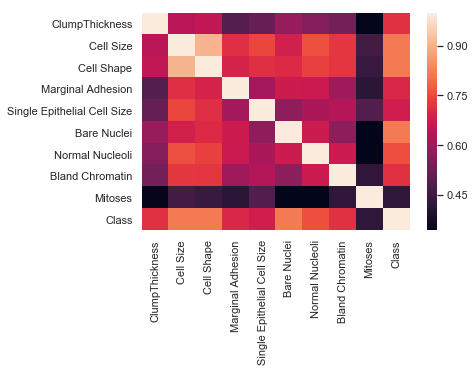

In [379]:
sns.heatmap(X.corr())

In [380]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [381]:
#Let us check for pair plots

C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


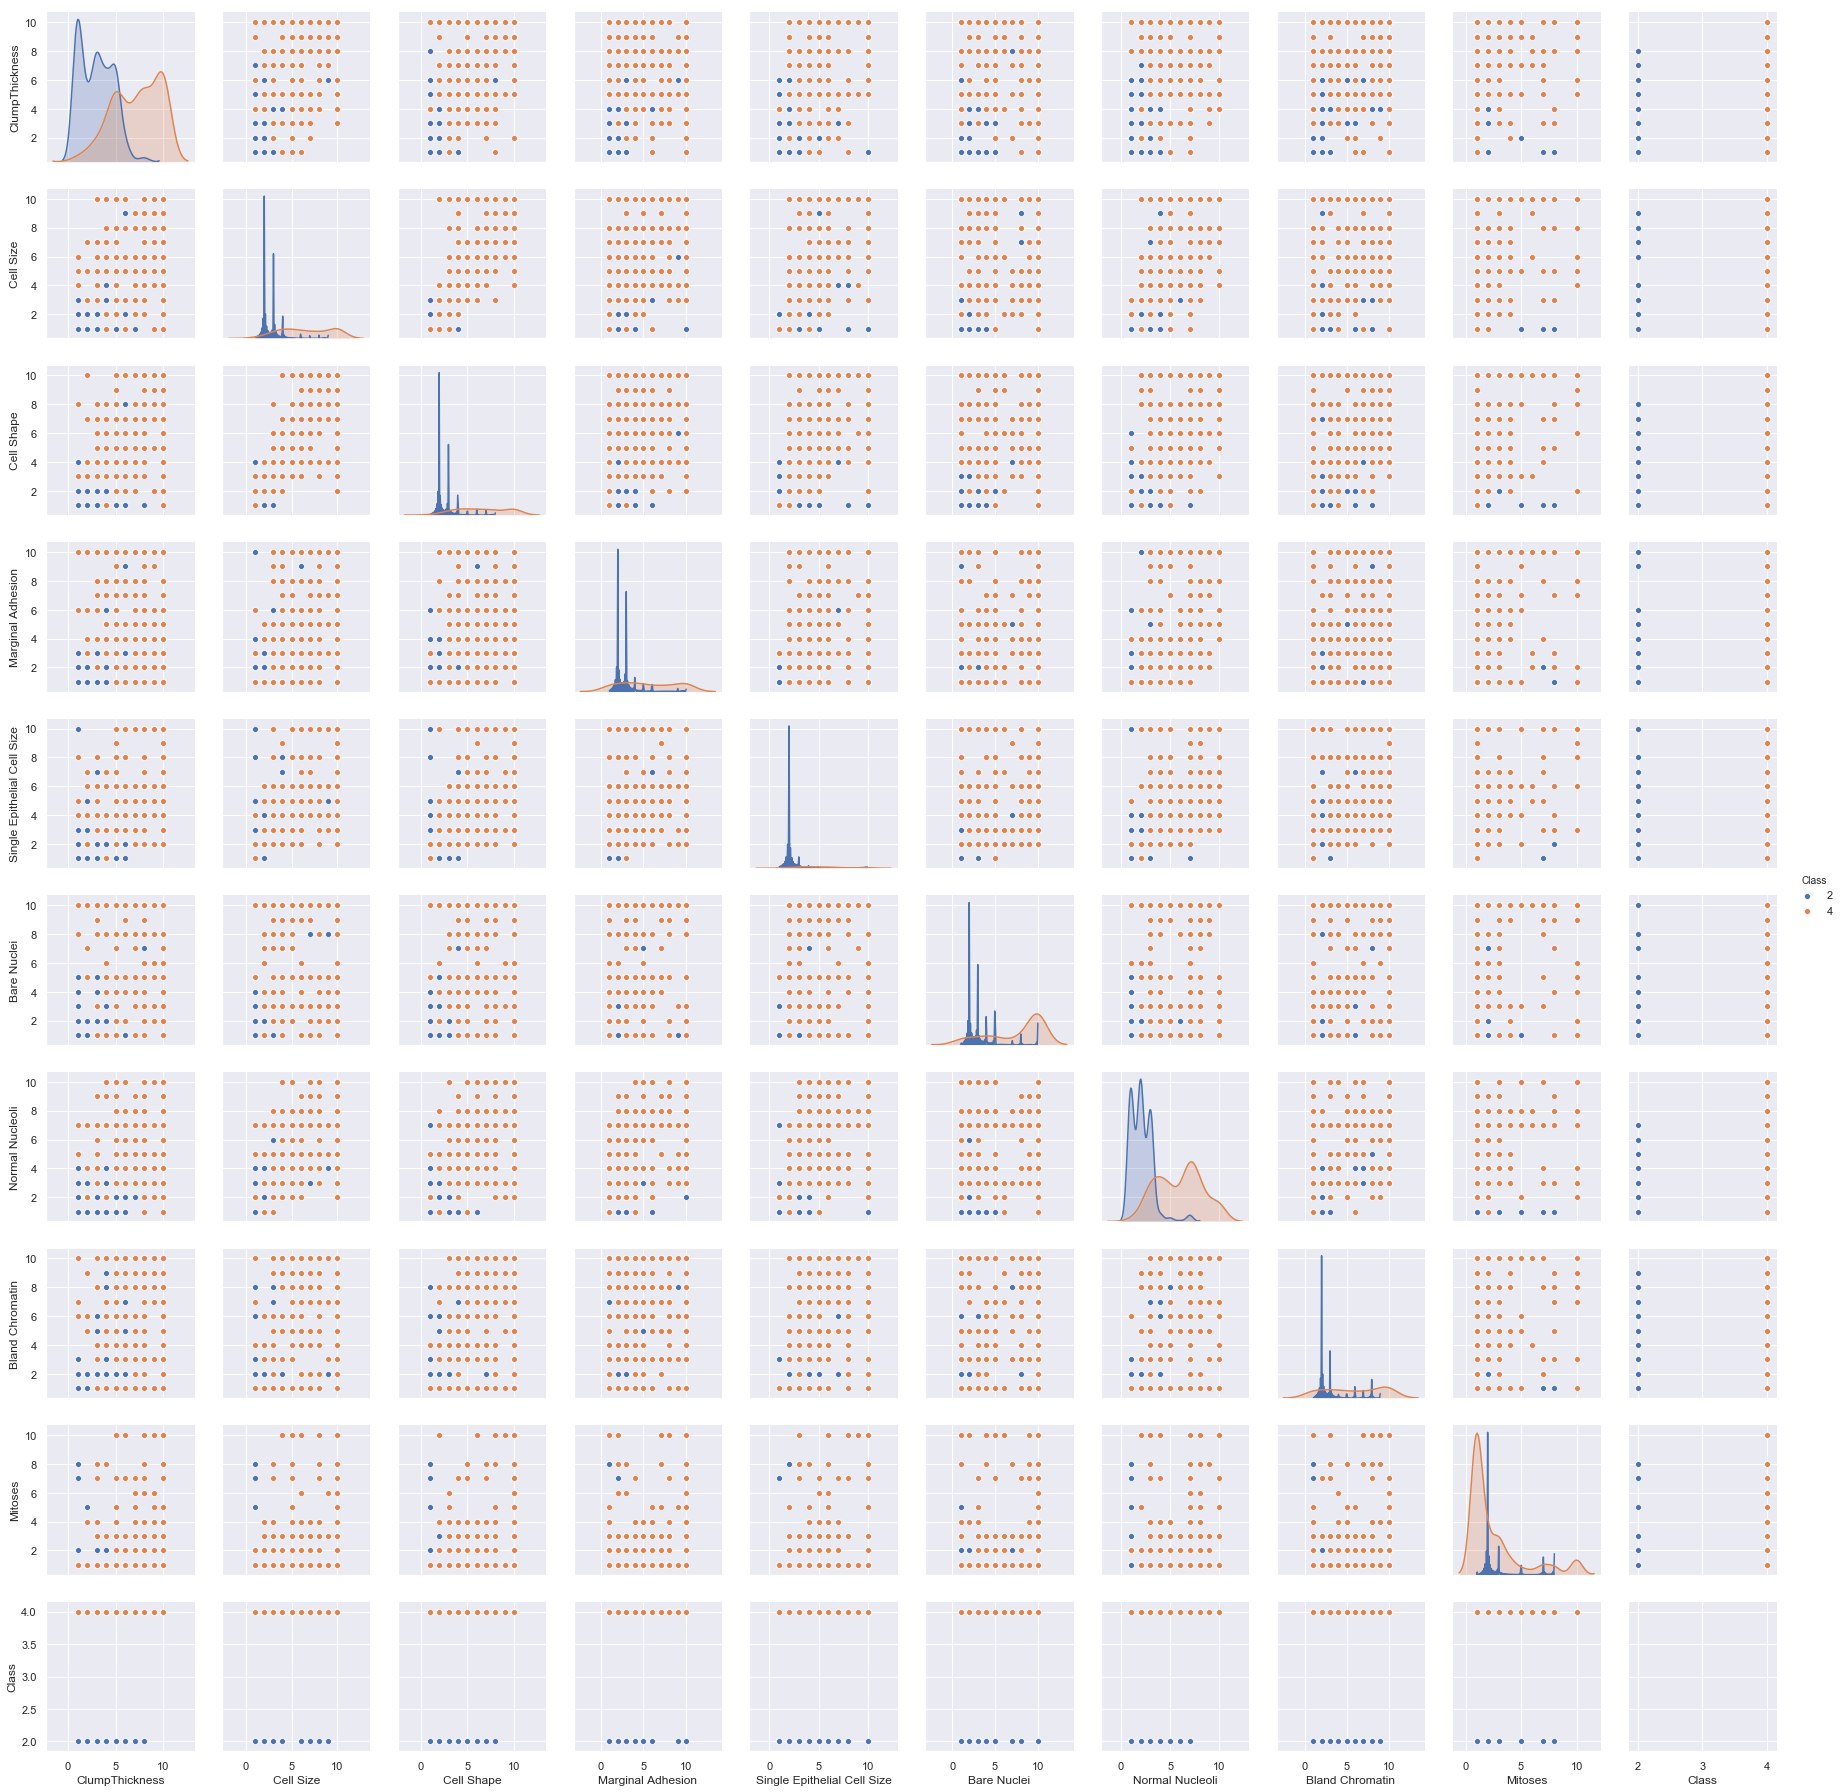

In [382]:
sns.pairplot(X, hue = 'Class' )

In [383]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

If we see correlation matrix and pairplot combined, we can say that Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin
Target variable shows high correlation with most of these variables except Mitoses.

Distribution of classes among features are not normal for most of the features. Class 4 is skewed in most of the features and their are many outliers in class 2. 

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [384]:
# We could see most of the outliers are now removed.

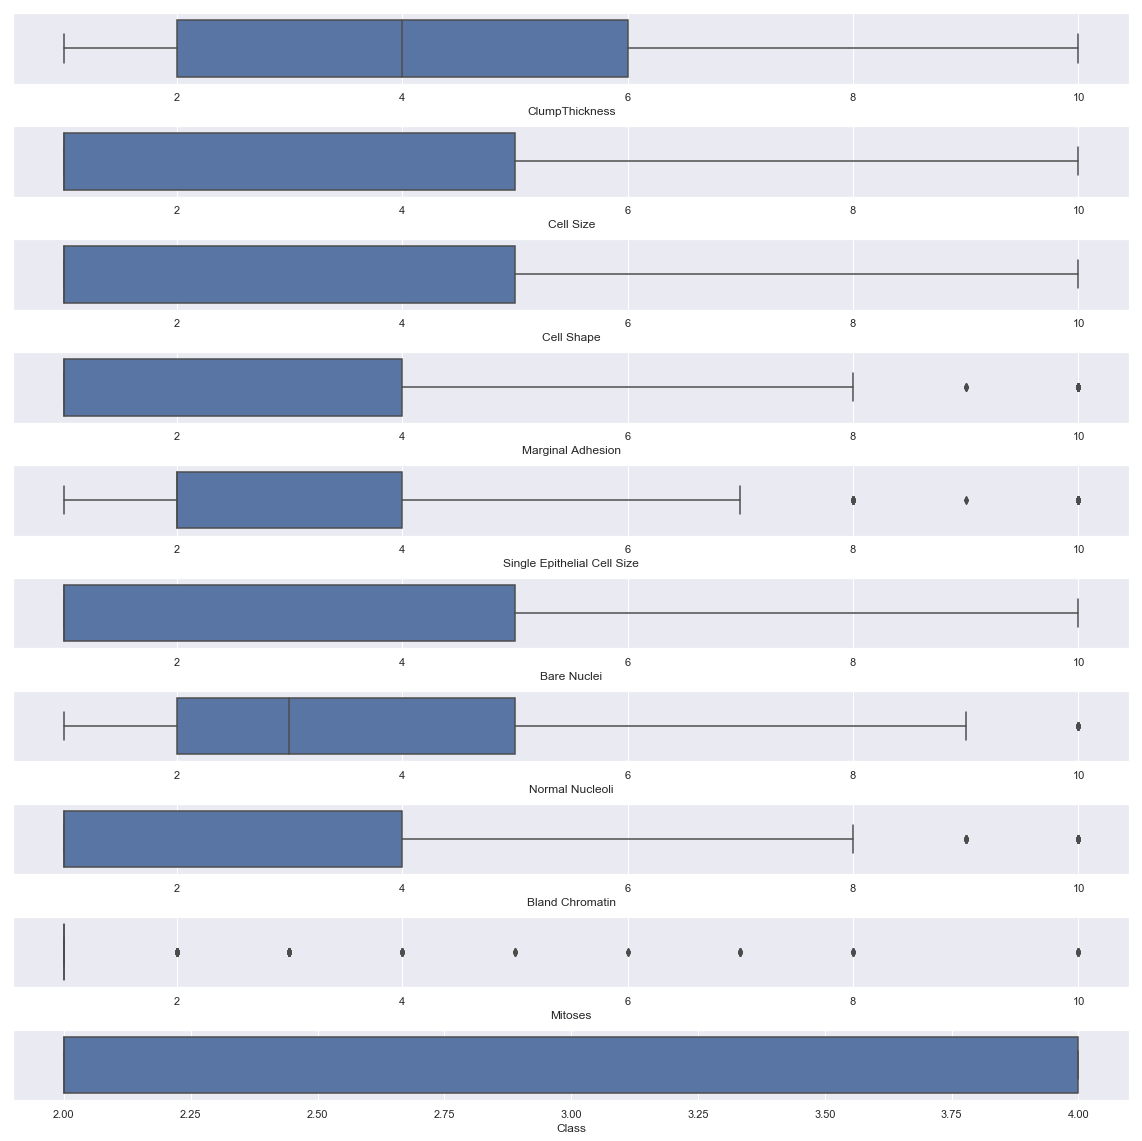

In [385]:
sns.set(rc={'figure.figsize':(20,20)})
plt.subplots_adjust(hspace=0.6, wspace=0.4)
sns.boxplot(X['ClumpThickness'], ax=plt.subplot(10,1,1))
sns.boxplot(X['Cell Size'], ax=plt.subplot(10,1,2))
sns.boxplot(X['Cell Shape'], ax=plt.subplot(10,1,3))
sns.boxplot(X['Marginal Adhesion'], ax=plt.subplot(10,1,4))
sns.boxplot(X['Single Epithelial Cell Size'], ax=plt.subplot(10,1,5))
sns.boxplot(X['Bare Nuclei'], ax=plt.subplot(10,1,6))
sns.boxplot(X['Normal Nucleoli'], ax=plt.subplot(10,1,7))
sns.boxplot(X['Bland Chromatin'], ax=plt.subplot(10,1,8))
sns.boxplot(X['Mitoses'], ax=plt.subplot(10,1,9))
sns.boxplot(X['Class'], ax=plt.subplot(10,1,10));

In [386]:
X.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [387]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers


In [388]:
print('column: \t #count \t values')
for column in X:
    outliers=[]
    print(column, '\t', len(detect_outlier(X[column])), '\t' , detect_outlier(X[column]), )
    

column: 	 #count 	 values
ClumpThickness 	 0 	 []
Cell Size 	 0 	 []
Cell Shape 	 0 	 []
Marginal Adhesion 	 0 	 []
Single Epithelial Cell Size 	 30 	 [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Bare Nuclei 	 0 	 []
Normal Nucleoli 	 0 	 []
Bland Chromatin 	 0 	 []
Mitoses 	 31 	 [7, 10, 8, 10, 7, 10, 10, 8, 7, 8, 7, 7, 10, 7, 10, 10, 10, 8, 8, 10, 10, 8, 10, 7, 8, 10, 7, 10, 10, 7, 8, 7, 10, 8, 10, 7, 10, 10, 8, 7, 8, 7, 7, 10, 7, 10, 10, 10, 8, 8, 10, 10, 8, 10, 7, 8, 10, 7, 10, 10, 7, 8]
Class 	 0 	 []


If we see Single Epithelial Cell Size and Mitoses has outliers. 

###### Single Epithelial Cell Size has value 10 as outliers, hence will see in which class we should move this is. 

In [389]:
X['Single Epithelial Cell Size'].value_counts()

2     382
3      71
4      48
1      45
6      41
5      39
10     30
8      20
7      12
9       2
Name: Single Epithelial Cell Size, dtype: int64

In [390]:
pd.crosstab(X['Single Epithelial Cell Size'],X['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


###### value 10 has most of the points in class '4' hence will replace 10 with 9 to keep it in class '4' only. 

In [391]:
X['Single Epithelial Cell Size']=np.where(X['Single Epithelial Cell Size']==10,9,X['Single Epithelial Cell Size'])

In [392]:
pd.crosstab(X['Single Epithelial Cell Size'],X['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,1,31


###### Simillarly for Mitoses, 7,8,10 are outliers.

In [393]:
X['Mitoses'].value_counts()

1     571
2      35
3      32
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [394]:
pd.crosstab(X['Mitoses'],X['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [395]:
X['Mitoses']=np.where(X['Mitoses']>6,6,X['Mitoses'])

In [396]:
pd.crosstab(X['Mitoses'],X['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,2,32


# Q6 Create a covariance matrix for identifying Principal components

In [397]:
X_std = StandardScaler().fit_transform(X.drop(['Class'],axis=1))

C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [398]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.48842317 0.52670472 0.59150555
  0.56187702 0.53628373 0.37633876]
 [0.64410677 1.00145138 0.9066632  0.71396807 0.75989276 0.68556472
  0.76073447 0.7281282  0.48763714]
 [0.65453792 0.9066632  1.00145138 0.6917849  0.72817733 0.70518656
  0.73964761 0.72557104 0.46650278]
 [0.48842317 0.71396807 0.6917849  1.00145138 0.62196483 0.67348849
  0.67083263 0.60310209 0.45016663]
 [0.52670472 0.75989276 0.72817733 0.62196483 1.00145138 0.59596111
  0.63388731 0.65281763 0.49089944]
 [0.59150555 0.68556472 0.70518656 0.67348849 0.59596111 1.00145138
  0.67373075 0.57900023 0.39562092]
 [0.56187702 0.76073447 0.73964761 0.67083263 0.63388731 0.67373075
  1.00145138 0.67006996 0.37706523]
 [0.53628373 0.7281282  0.72557104 0.60310209 0.65281763 0.57900023
  0.67006996 1.00145138 0.45365491]
 [0.37633876 0.48763714 0.46650278 0.45016663 0.49089944 0.39562092
  0.37706523 0.45365491 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [399]:
# Step 2- Get eigen values and eigen vector

In [400]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [401]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30037949  0.16409233 -0.86621368 -0.00277674 -0.00640763  0.25254575
  -0.15004487  0.21488457  0.00166202]
 [-0.37875581  0.0650247   0.04508643 -0.73717897 -0.18632642 -0.42794964
   0.1573947   0.20160313 -0.15354107]
 [-0.37505831  0.1021981  -0.01168676  0.66316092 -0.16524134 -0.58363968
   0.11553599  0.12169092 -0.11344872]
 [-0.33297161  0.02398603  0.37210165  0.04402264  0.48666359  0.15502544
  -0.4347283   0.54570571 -0.02234275]
 [-0.33844244 -0.12047604  0.1757759   0.06872674 -0.33323257  0.43565324
  -0.07021701 -0.23729767 -0.68792689]
 [-0.33228818  0.20249074 -0.05481036 -0.0726792   0.5783106  -0.14857018
  -0.06218272 -0.69239879 -0.0222848 ]
 [-0.34478599  0.23836728  0.18298132  0.06382733  0.03279973  0.41511407
   0.70643409  0.07828539  0.32889866]
 [-0.33513338 -0.01891649  0.15409561 -0.02358723 -0.47524347  0.05796921
  -0.46070729 -0.24181457  0.60256427]
 [-0.24212992 -0.91931058 -0.13385027  0.01425305  0.16933985 -0.02940435
   0

# Q8 Find variance and cumulative variance by each eigen vector

In [402]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explained", var_exp)
print("\nCumulative Variance Explained", cum_var_exp)

Variance Explained [66.20086458123741, 8.043181946627241, 6.008482063805137, 5.260395123719109, 3.9788659495587275, 3.359691267383893, 3.2544672935882106, 2.8914846836110573, 1.0025670904692217]

Cumulative Variance Explained [ 66.20086458  74.24404653  80.25252859  85.51292372  89.49178966
  92.85148093  96.10594823  98.99743291 100.        ]


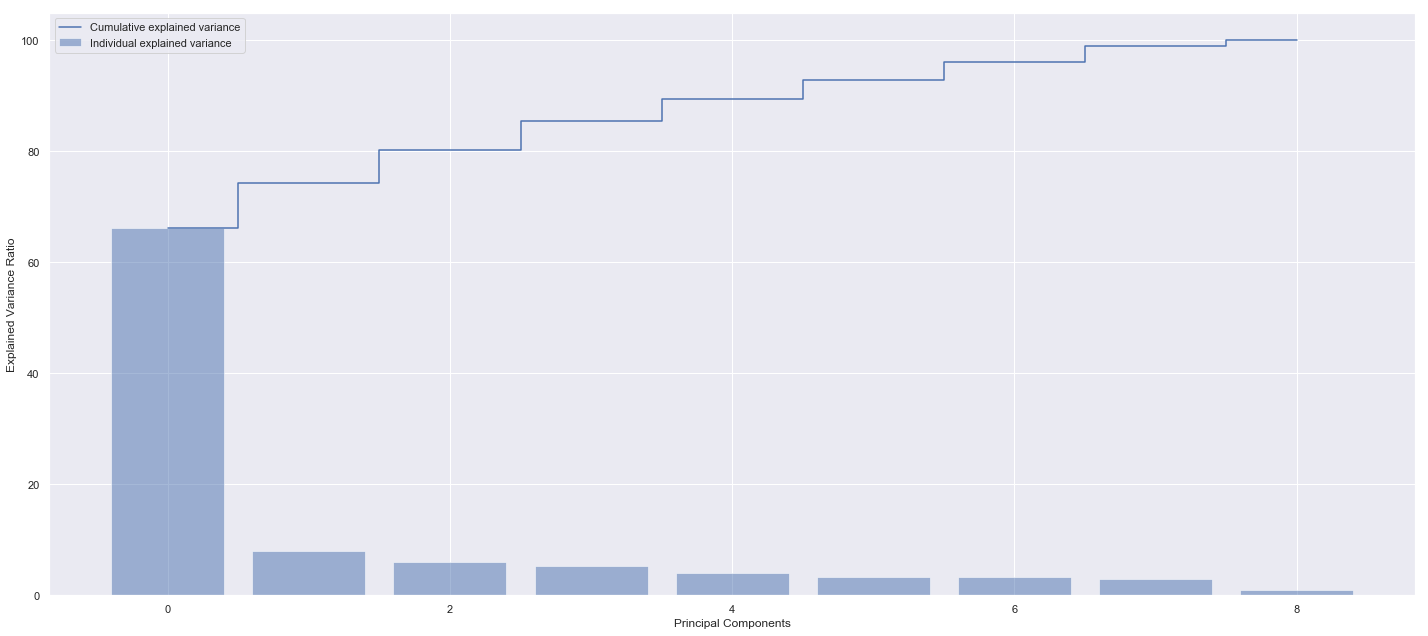

In [403]:
plt.figure(figsize=(20 , 9))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [404]:
#considering 85% cummulative variance hence end up with 4 PCAs
pca = PCA(n_components=4)
data_reduced = pca.fit_transform(X_std)
data_reduced.transpose()

array([[-1.47685973,  1.49580739, -1.59831429, ...,  3.90377477,
         2.24497887,  2.65140944],
       [-0.14786675, -0.55629078, -0.0873191 , ..., -0.17993786,
        -1.1993533 , -1.28699526],
       [-0.57351728,  0.31669192,  0.02667215, ...,  0.89720061,
         1.02294007,  1.11406429],
       [ 0.04550744, -0.76278645, -0.11904448, ...,  2.43616317,
         0.6040765 ,  0.23680027]])

In [405]:
# Loadings or Eigen vectors on the PCA components
pca.components_

array([[ 0.30037949,  0.37875581,  0.37505831,  0.33297161,  0.33844244,
         0.33228818,  0.34478599,  0.33513338,  0.24212992],
       [-0.16409233, -0.0650247 , -0.1021981 , -0.02398603,  0.12047604,
        -0.20249074, -0.23836728,  0.01891649,  0.91931058],
       [-0.86621368,  0.04508643, -0.01168676,  0.37210165,  0.1757759 ,
        -0.05481036,  0.18298132,  0.15409561, -0.13385027],
       [ 0.00640763,  0.18632642,  0.16524134, -0.48666359,  0.33323257,
        -0.5783106 , -0.03279973,  0.47524347, -0.16933985]])

C:\Users\sjain1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


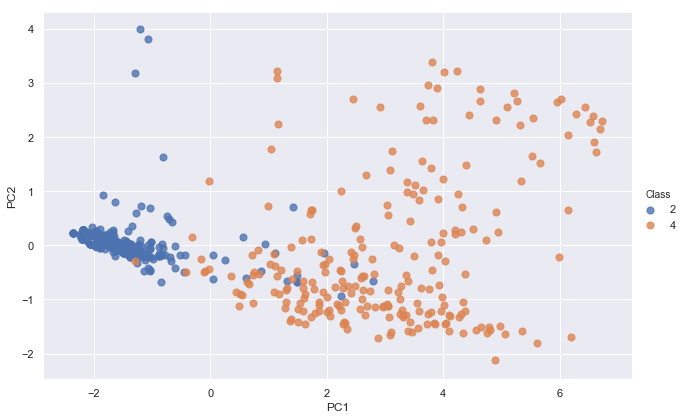

In [406]:
## Plot of PC components
X["PC1"] = data_reduced[:,0]
X["PC2"] = data_reduced[:,1]
X["PC3"] = data_reduced[:,2]
X["PC4"] = data_reduced[:,3]
vis = sns.lmplot(data = X[["PC1","PC2","PC3","PC4","Class"]], x = "PC1", y = "PC2", fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

# Q10 Find correlation between components and features

In [407]:
X.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,PC1,PC2,PC3,PC4
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.525941,0.590648,0.561063,0.535507,0.375793,0.716812,7.332015e-01,-1.396122e-01,-6.369842e-01,4.408877e-03
Cell Size,0.643173,1.000000,0.905349,0.712933,0.758791,0.684571,0.759632,0.727073,0.486930,0.817586,9.245117e-01,-5.532400e-02,3.315503e-02,1.282050e-01
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.727122,0.704165,0.738576,0.724519,0.465827,0.817551,9.154864e-01,-8.695169e-02,-8.594050e-03,1.136970e-01
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.621063,0.672512,0.669860,0.602228,0.449514,0.701175,8.127562e-01,-2.040768e-02,2.736310e-01,-3.348569e-01
Single Epithelial Cell Size,0.525941,0.758791,0.727122,0.621063,1.000000,0.595097,0.632969,0.651872,0.490188,0.695851,8.261100e-01,1.025028e-01,1.292596e-01,2.292862e-01
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.595097,1.000000,0.672754,0.578161,0.395048,0.816655,8.110880e-01,-1.722822e-01,-4.030569e-02,-3.979162e-01
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.632969,0.672754,1.000000,0.669099,0.376519,0.756736,8.415941e-01,-2.028065e-01,1.345583e-01,-2.256840e-02
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.651872,0.578161,0.669099,1.000000,0.452997,0.715363,8.180329e-01,1.609444e-02,1.133167e-01,3.269991e-01
Mitoses,0.375793,0.486930,0.465827,0.449514,0.490188,0.395048,0.376519,0.452997,1.000000,0.466165,5.910191e-01,7.821633e-01,-9.842896e-02,-1.165171e-01
Class,0.716812,0.817586,0.817551,0.701175,0.695851,0.816655,0.756736,0.715363,0.466165,1.000000,8.953513e-01,-1.069415e-01,-9.360998e-02,-7.761171e-02


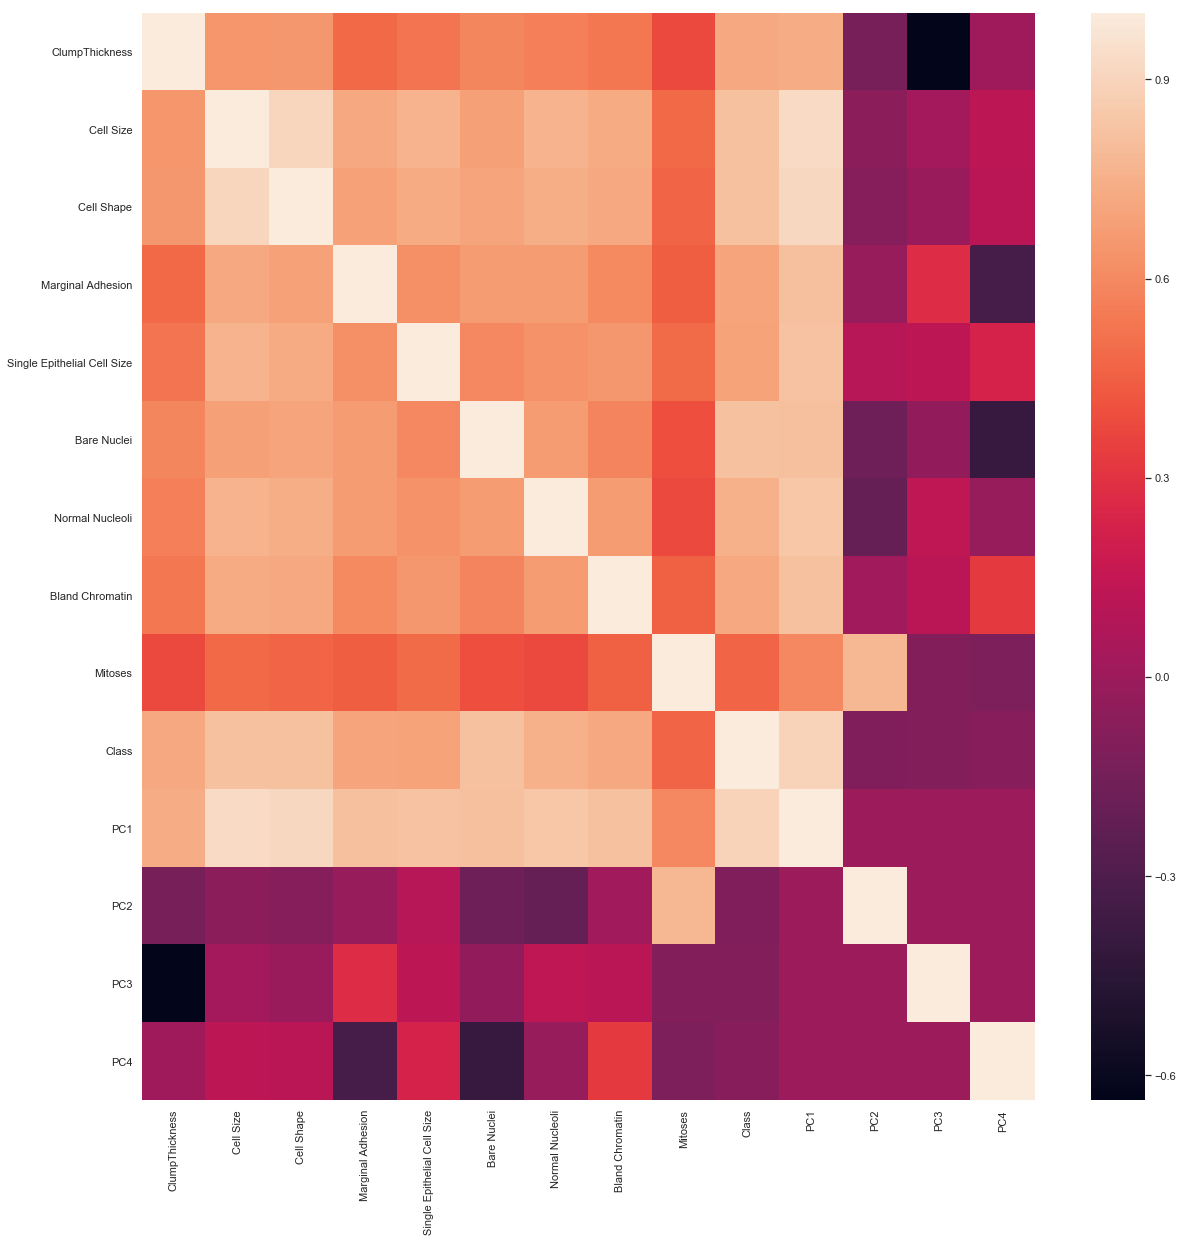

In [408]:
sns.heatmap(X.corr())

We can see that PCS has very bad correlation with the features and among them selves as well. 

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [409]:
jokes=pd.read_csv('jokes.csv')

In [410]:
jokes.shape

(24983, 101)

In [411]:
jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [412]:
ratings=jokes.iloc[:200,1:]

In [413]:
ratings.shape

(200, 100)

In [414]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 Change the column indices from 0 to 99

In [415]:
ratings.columns=range(0,100)

In [416]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [417]:
ratings.replace(99.00, 0, inplace=True)

In [418]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [419]:
sc=StandardScaler()

In [420]:
ratings_diff=sc.fit_transform(ratings.T)

In [421]:
ratings_diff=pd.DataFrame(ratings_diff.T)

In [422]:
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.927207,1.989411,-1.250300,-0.986909,-0.874529,-1.046611,-1.283663,1.178166,-1.130896,-0.389889,...,0.941114,0.445939,0.445939,0.445939,0.445939,0.445939,-0.542656,0.445939,0.445939,0.445939
1,0.274579,-0.625106,0.743980,0.334284,-1.055391,-2.554180,-0.715693,-1.664789,1.262792,1.332790,...,0.015173,-1.584496,-0.625106,1.052797,-0.604519,-1.005980,0.064584,-0.495403,-1.454794,-0.345113
2,-0.787867,-0.787867,-0.787867,-0.787867,1.257275,1.311631,1.257275,1.311631,-0.787867,-0.787867,...,-0.787867,-0.787867,-0.787867,1.268600,-0.787867,-0.787867,-0.787867,-0.787867,-0.787867,-0.787867
3,-0.347962,1.929242,-0.347962,-0.347962,0.142932,1.877425,-1.117030,1.345623,-0.347962,0.153841,...,-0.347962,-0.347962,-0.347962,-0.203421,-0.347962,-0.347962,-0.347962,-0.347962,-0.347962,-0.347962
4,1.306203,0.389048,-1.681034,-1.968676,-0.377212,-0.320627,0.961975,0.389048,-0.801603,0.653113,...,0.525796,0.617747,0.308885,0.525796,0.653113,-0.332416,0.035389,0.846447,-0.273472,-0.320627


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [423]:
rnge=range(0,100)
jokes_ratings=[]
for column in ratings_diff:
    jokes_ratings.append(ratings_diff[column].mean())

In [424]:
jokes_ratings

[-0.00750712115405096,
 -0.04599906389167069,
 -0.10707626791592632,
 -0.3294602426283626,
 -0.17790900794425568,
 0.14416334918472593,
 -0.1424594753328267,
 -0.252950497934856,
 -0.14446555307373743,
 0.0750096290371869,
 0.1269258903851341,
 0.13623835851654506,
 -0.4910620312344627,
 0.305134056803514,
 -0.5730686504059929,
 -0.9238615771336716,
 -0.49712044043154585,
 -0.37160085867026943,
 -0.1170484378643657,
 -0.3970454656695814,
 0.4416328290910345,
 0.0753855517605076,
 -0.1050732017159212,
 -0.42382900728705264,
 -0.02252965850925496,
 0.08707341996677868,
 0.6097236232063715,
 0.10289024347897469,
 0.6642304003198055,
 -0.3588574721241285,
 0.5024910165598926,
 0.5218907462152005,
 -0.1927427267427026,
 0.07743073314289738,
 0.6923038898773739,
 0.7519717787678605,
 -0.2993698199662517,
 0.0751036994746866,
 0.05124105140317401,
 -0.013232820296221661,
 -0.21815835040354487,
 0.3748625168690581,
 -0.2959715570420009,
 -0.457111054932052,
 -0.03619337406054603,
 0.3148933381

In [425]:
final_rating=pd.DataFrame(data={'Jokes':rnge, 'ratings': jokes_ratings})

In [426]:
final_rating.head()

,Jokes,ratings
0,0,-0.007507
1,1,-0.045999
2,2,-0.107076
3,3,-0.329460
4,4,-0.177909


In [427]:
print("Top 10 ratings by Joke IDs")
final_rating.sort_values(by='ratings',ascending=False).head(10)

Top 10 ratings by Joke IDs


,Jokes,ratings
49,49,0.878217
35,35,0.751972
52,52,0.736700
34,34,0.692304
28,28,0.664230
26,26,0.609724
61,61,0.557550
48,48,0.532007
31,31,0.521891
30,30,0.502491
